In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Code from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        pass
        # print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# ---------------------------------------

def get_info(predicted, y, name, conf_matrix=False):
    cm = confusion_matrix(y, predicted)

    print(f'Accuracy score ({name}): ', accuracy_score(y, predicted))

    print('Precision: ', precision_score(y, predicted))
    print('Recall: ', recall_score(y, predicted))
    print()
    
    if conf_matrix:
        plot_confusion_matrix(cm, classes=[' does not deteriorate','does deteriorate'], title=f'Confusion matrix ({name})')

In [3]:
data = pd.read_csv('E:/lab1_data/bank_scoring_train.csv', sep='\t')
data_test = pd.read_csv('E:/lab1_data/bank_scoring_test.csv', sep='\t')

In [4]:
x_train = data.drop(['SeriousDlqin2yrs'], axis=1)
y_train = data['SeriousDlqin2yrs'] 
x_test = data_test.drop(['SeriousDlqin2yrs'], axis=1)
y_test = data_test['SeriousDlqin2yrs']

# K Neighbors Classifier

In [5]:
recall = [] 
for n in range(1, 16, 2):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)

    recall.append({'recall': recall_score(y_test, predicted),
                   'n': n})

max_recall = max(recall, key=lambda i: i['recall'])
print(max_recall)

recall = [] 
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=1, metric=metric)
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)

    recall.append({'recall': recall_score(y_test, predicted),
                   'metric': metric})

max_recall = max(recall, key=lambda i: i['recall'])
print(max_recall)

{'recall': 0.5996354799513973, 'n': 1}
{'recall': 0.5996354799513973, 'metric': 'euclidean'}


Accuracy score (test):  0.9536856109425019
Precision:  0.6844660194174758
Recall:  0.5996354799513973

Accuracy score (train):  0.9999584268728694
Precision:  0.9993964996982498
Recall:  1.0



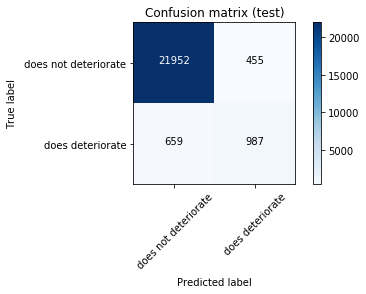

In [6]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

predicted_test = model.predict(x_test)
predicted_train = model.predict(x_train)

get_info(predicted_test, y_test, 'test', True)
get_info(predicted_train, y_train, 'train')

# Decision Tree Classifier

In [7]:
recall = [] 
for min_samples_split in range(2, 16):
    model = tree.DecisionTreeClassifier(random_state=1, min_samples_split=min_samples_split)
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)

    recall.append({'recall': recall_score(y_test, predicted),
                   'min_split': min_samples_split})

max_recall = max(recall, key=lambda i: i['recall'])
print(max_recall)

recall = [] 
for max_depth in range(1, 50):
    model = tree.DecisionTreeClassifier(random_state=1, min_samples_split=2, max_depth=max_depth)
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)

    recall.append({'recall': recall_score(y_test, predicted),
                   'max_depth': max_depth})

max_recall = max(recall, key=lambda i: i['recall'])
print(max_recall)

{'recall': 0.6688942891859052, 'min_split': 2}
{'recall': 0.6713244228432563, 'max_depth': 32}


Accuracy score (test):  0.9525630898432628
Precision:  0.6480938416422287
Recall:  0.6713244228432563

Accuracy score (train):  0.9997089881100857
Precision:  0.9993943064809206
Recall:  0.9963768115942029



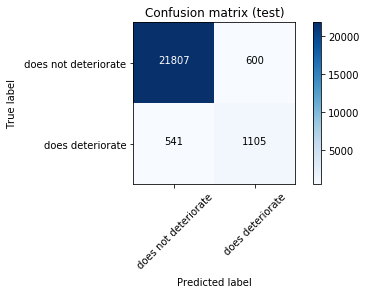

In [8]:
model_tree = tree.DecisionTreeClassifier(random_state=1, min_samples_split=2, max_depth=32)
model_tree.fit(x_train, y_train)

tree_pred_test = model_tree.predict(x_test)
tree_pred_train = model_tree.predict(x_train)

get_info(tree_pred_test, y_test, 'test', True)
get_info(tree_pred_train, y_train, 'train')

DecisionTreeClassifier worked best